<a href="https://colab.research.google.com/github/Suman-Adhikary/Loan-prediction-Analytics-Vidya-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries.

In [69]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Data Processing.

In [70]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [71]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [73]:
# Concat train and test data.
X = pd.concat([train_data.iloc[:, 0:-1], test_data], axis = 0)
y = train_data.iloc[:, -1]

In [74]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [75]:
X.shape

(981, 12)

In [76]:
y.head

<bound method NDFrame.head of 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object>

In [77]:
y.shape

(614,)

In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


# Data Handling

## Missing value, Number of Missing and it's percentage, Data type.

In [79]:
Col = [col for col in X.columns if X[col].isna().sum() > 0]
Missing_value = [X[col].isna().sum() for col in X.columns if X[col].isna().sum() > 0]
Percentage_missing = [round(X[col].isna().sum() / len(X[col]) * 100, 2) for col in X.columns if X[col].isna().sum() > 0]
Datatype = [X[col].dtypes for col in X.columns if X[col].isna().sum() > 0]

In [80]:
myTable = PrettyTable()
myTable.add_column("Column Name", Col)
myTable.add_column("No of missing", Missing_value)
myTable.add_column("Percentage of missing", Percentage_missing)
myTable.add_column("Data Type", Datatype)
print(myTable)

+------------------+---------------+-----------------------+-----------+
|   Column Name    | No of missing | Percentage of missing | Data Type |
+------------------+---------------+-----------------------+-----------+
|      Gender      |       24      |          2.45         |   object  |
|     Married      |       3       |          0.31         |   object  |
|    Dependents    |       25      |          2.55         |   object  |
|  Self_Employed   |       55      |          5.61         |   object  |
|    LoanAmount    |       27      |          2.75         |  float64  |
| Loan_Amount_Term |       20      |          2.04         |  float64  |
|  Credit_History  |       79      |          8.05         |  float64  |
+------------------+---------------+-----------------------+-----------+


## Correlation plot.

<ipython-input-81-7252bcff879a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = X.corr()


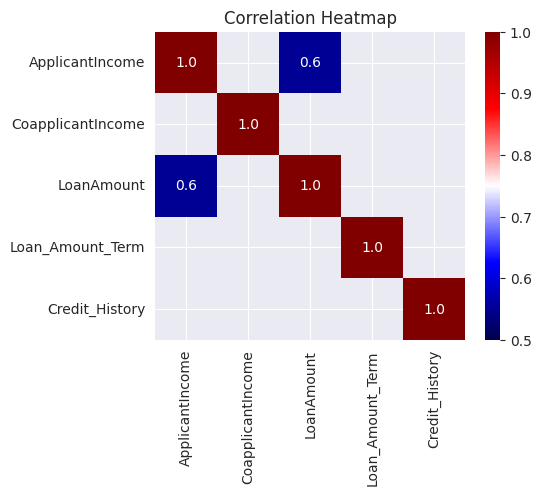

In [81]:
corr_mat = X.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='seismic',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

## Handling the missing value.

### Numeric data.

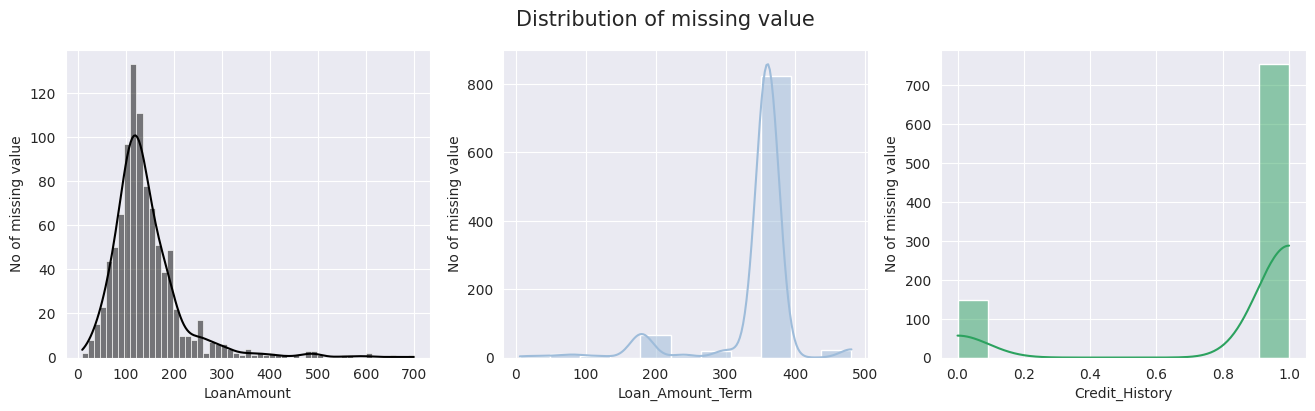

In [82]:
numeric_col = [col for col in X.columns if X[col].dtypes == 'float64' and X[col].isna().sum() > 0]
fig, axs = plt.subplots(1, 3, figsize=(16, 4), squeeze=False)
Color = ['black', '#9ebcda', '#2ca25f']

Axis = []
for j in range(1):
    for k in range(3):
        Axis.append(axs[j, k])

for i in range(len(numeric_col)):
    sns.histplot(X[numeric_col[i]], kde=True, color=Color[i], ax=Axis[i])
    Axis[i].set_ylabel('No of missing value')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)
    
fig.suptitle("Distribution of missing value", fontsize=15)
plt.show()

In [ ]:
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
numeric_imputer.fit(X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'] = numeric_imputer.transform(X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

In [ ]:
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
numeric_imputer.fit(X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'] = numeric_imputer.transform(X['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

### Relation between ApplicantIncome and LoanAmount.

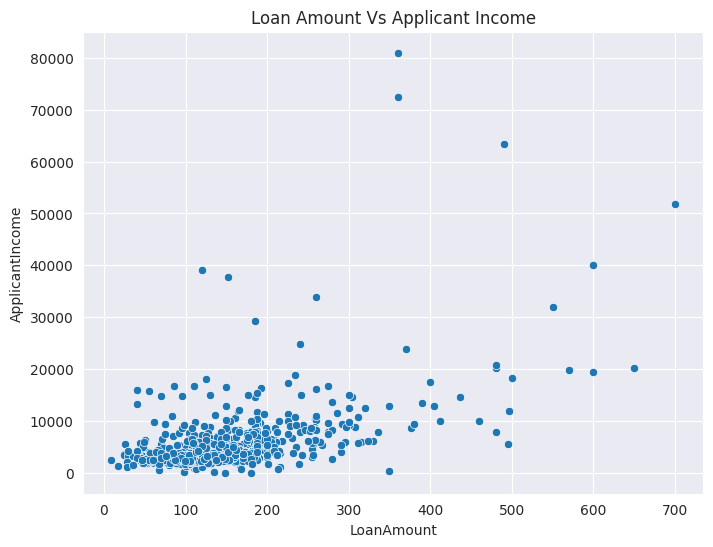

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=X)
title = plt.title('Loan Amount Vs Applicant Income')

In [84]:
outlier_index = X[(X['LoanAmount'] > 520)
                           & (X['ApplicantIncome'] > 23000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

In [85]:
X.shape, y.shape

((975, 12), (611,))